# 13. Validation Curves
In notebook 12.1 and 12.2, I plotted the learning curves by looking at different training set sizes. In this notebook, I will look into the validation curves. 

## Preprocessing

In [1]:
import pandas as pd
from preprocessing import PreProcessor

pp = PreProcessor()

df = pd.read_csv('Structured_DataFrame_Sample_500.csv', index_col=0)
df['Item Description'] = df['Item Description'].apply(lambda d: pp.preprocess(str(d)))

print(df.shape)
print('Number of unique categories: ' + str(len(df.Category.unique())))

(15000, 3)
Number of unique categories: 30


## Vectorizing and splitting

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

tfidf = TfidfVectorizer(min_df=20, ngram_range=(1, 2))
features = tfidf.fit_transform(df['Item Description'])
labels = df.category_id

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)

## Training SVC
In the tutorial I found, they used SVC. To see if it even worked, I tried this first on our data.

In [7]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

param_range = np.logspace(-6, -1, 5)

train_scores, test_scores = validation_curve(SVC(), features, labels, param_name="gamma", param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

## Plotting SVC

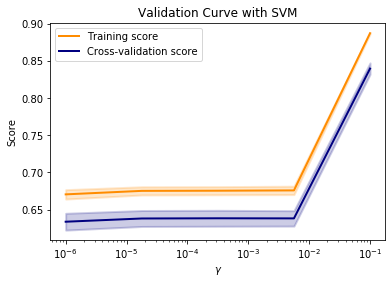

In [17]:
import matplotlib.pyplot as plt

plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")

lw = 2

plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

## Training Linear SVC
Beacause Linear SVC turned out to be the best method for our Kaggle dataset, I wanted to see if I could use the Validation Curve with this method.

In [25]:
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.model_selection import validation_curve

param_range = [500, 1000, 1500]

train_scores, test_scores = validation_curve(LinearSVC(), features, labels, param_name="max_iter", 
                                             param_range=param_range, scoring="accuracy")

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


## Plotting Linear SVC

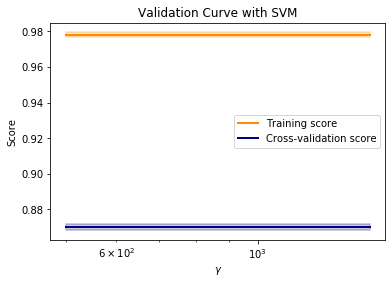

In [26]:
import matplotlib.pyplot as plt

plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")

lw = 2

plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

## Training SVC with different parameters

In [23]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

param_range = np.logspace(-6, -1, 5, 10, 20)

train_scores, test_scores = validation_curve(SVC(), features, labels, param_name="gamma", param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

## Plotting SVC with different parameters

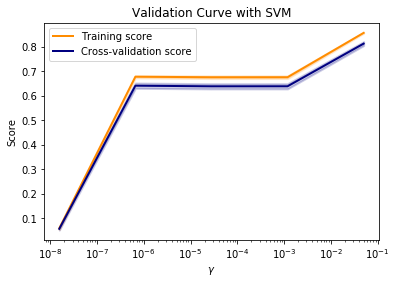

In [24]:
import matplotlib.pyplot as plt

plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")

lw = 2

plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()